In [18]:
import pandas as pd
import numpy as np

In [19]:
import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "C:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknow system... sorry~')
    
plt.rcParams['axes.unicode_minus'] = False

In [20]:
bit_interest = pd.read_csv('../upbit/output/비트코인+일별시장금리.csv', encoding='utf-8', index_col=0)
bit_interest

,date,open,high,low,close,volume,tmp
0,2017-09-25,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,1.72
1,2017-09-26,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,1.74
2,2017-09-27,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.79
3,2017-09-28,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,1.79
4,2017-09-29,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,1.79
...,...,...,...,...,...,...,...
1342,2021-05-29,43723000.0,44812000.0,41405000.0,42688000.0,10628.404447,NaN
1343,2021-05-30,42688000.0,43827000.0,40580000.0,43177000.0,9194.807917,NaN
1344,2021-05-31,43177000.0,44235000.0,41304000.0,43761000.0,10111.066220,0.94
1345,2021-06-01,43761000.0,44550000.0,42515000.0,43200000.0,9081.150288,0.94


In [21]:
import os
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# for offline ploting
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# 그래프 일봉

In [119]:
fig = make_subplots(rows=2, cols=1, 
                    shared_xaxes=True, 
                    vertical_spacing=0.01,
                    specs=[[{"secondary_y": True}],[{"secondary_y": True}]])

In [120]:
fig.add_trace(go.Scatter(x = bit_interest.date, y = bit_interest.close,
                        mode = 'lines', name =  '비트코인 가격', connectgaps=True, marker_color= 'green', line = dict(width=3)),
                secondary_y = True,row = 1, col = 1)

fig.add_trace(go.Scatter(x = bit_interest.date, y = bit_interest.tmp,
                         mode = 'lines', name = '일별 시장금리', connectgaps=True, marker_color= 'orange', line = dict(width=1.5)),
                secondary_y = False,row = 1, col = 1)

fig.add_trace(go.Scatter(x = bit_interest.date, y = bit_interest.high,
                        mode = 'lines', name =  '상한가', connectgaps=True, marker_color= 'red', line = dict(width=3)),
                secondary_y = True,row = 1, col = 1)

fig.add_trace(go.Scatter(x = bit_interest.date, y = bit_interest.low,
                         mode = 'lines', name = '하한가', connectgaps=True, marker_color= 'blue', line = dict(width=1.5)),
                secondary_y = True,row = 1, col = 1)


fig.add_trace(go.Bar(x=bit_interest.date, y=bit_interest.volume, name = '비트코인 거래량', marker_color= 'blue'),
                secondary_y = False,row = 2, col = 1)

fig.add_trace(go.Scatter(x = bit_interest.date, y = bit_interest.tmp,
                         mode = 'lines', name = '일별 시장금리', connectgaps=True, marker_color= 'red', line = dict(width=1.5)),
                secondary_y = True,row = 2, col = 1)

# 세로선 
fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2018-04-04', x1= '2018-04-04', 
      line= {'color': 'black', 'width': 1, 'dash': 'dot'}
    )
])

#서식
fig.update_layout(height=800, width=950, barmode='stack',
                  title_text= "시장금리와 일봉 비트코인 비교")

fig.update_yaxes(title_text="시장금리와 비트코인 가격", row = 1, col = 1)
fig.update_yaxes(title_text="시장금리와 비트코인 거래량", row = 2, col = 1)



fig.add_annotation(
                x='2018-04-04',y=1.05,
                yref='paper',showarrow=False,
                text='미, 국채금리 하락  <br> 2018/04/04')


# 그래프 월봉

In [24]:
month = pd.read_csv('../upbit/output/비트코인+시장금리_월봉.csv', encoding='utf-8')
month

,date,open,high,low,close,volume,total_mean
0,2017-09-01,4201000.0,4896000.0,4175000.0,4895000.0,3.474819e+02,2.02
1,2017-10-01,4889000.0,7479000.0,4682000.0,7422000.0,4.282096e+03,2.25
2,2017-11-01,7422000.0,13750000.0,6476000.0,11935000.0,3.328704e+05,2.35
3,2017-12-01,11935000.0,24967000.0,11201000.0,19280000.0,1.423404e+06,2.29
4,2018-01-01,19278000.0,28885000.0,10400000.0,11429000.0,1.138496e+06,2.42
5,2018-02-01,11439000.0,14149000.0,6620000.0,11860000.0,7.806840e+05,2.53
6,2018-03-01,11865000.0,12899000.0,7431000.0,7697000.0,5.759458e+05,2.49
7,2018-04-01,7688000.0,10755000.0,7087000.0,10138000.0,5.736338e+05,2.43
8,2018-05-01,10135000.0,10963000.0,7813000.0,8282000.0,2.722675e+05,2.51
9,2018-06-01,8278000.0,8490000.0,6590000.0,7164000.0,1.177830e+05,2.43


In [121]:
fig = make_subplots(rows=2, cols=1, 
                    shared_xaxes=True, 
                    vertical_spacing=0.01,
                    specs=[[{"secondary_y": True}],[{"secondary_y": True}]])

In [122]:

#시장금리와 월봉 비트코인 가격
fig.add_trace(go.Scatter(x = month.date, y = month.total_mean,
                         mode = 'lines', name = '월별 시장금리', connectgaps=True, marker_color= 'orange', line = dict(width=1.5)),
                secondary_y = False,row = 1, col = 1)

fig.add_trace(go.Scatter(x = month.date, y = month.close,
                        mode = 'lines', name =  '비트코인 가격', connectgaps=True, marker_color= 'green', line = dict(width=3)),
                secondary_y = True,row = 1, col = 1)

fig.add_trace(go.Scatter(x = month.date, y = month.high,
                        mode = 'lines', name =  '상한가', connectgaps=True, marker_color= 'red', line = dict(width=3)),
                secondary_y = True,row = 1, col = 1)

fig.add_trace(go.Scatter(x = month.date, y = month.low,
                        mode = 'lines', name =  '하한가', connectgaps=True, marker_color= 'blue', line = dict(width=3)),
                secondary_y = True,row = 1, col = 1)

#시장금리와 월봉 비트코인 거래량
fig.add_trace(go.Bar(x=month.date, y=month.volume, name = '비트코인 거래량', marker_color= '#a8a894'),
                secondary_y = False,row = 2, col = 1)

fig.add_trace(go.Scatter(x = month.date, y = month.total_mean,
                         mode = 'lines', name = '월별 시장금리', connectgaps=True, marker_color= 'orange', line = dict(width=1.5)),
                secondary_y = True,row = 2, col = 1)

#서식
fig.update_layout(height=800, width=950, barmode='stack',
                  title_text= "월봉으로 보는 시장금리와 비트코인")

fig.update_yaxes(title_text="월봉 시장금리와 비트코인 가격", row = 1, col = 1)
fig.update_yaxes(title_text="월봉 시장금리와 비트코인 거래량", row = 2, col = 1)


# 일별 회귀분석 / 선형회귀

In [27]:
# 일별 단순회귀
import pandas as pd
from statsmodels.formula.api import ols

In [28]:
day = pd.read_csv('../upbit/output/비트코인+일별시장금리.csv', encoding='utf-8', index_col=0)
day.head()


,date,open,high,low,close,volume,tmp
0,2017-09-25,4201000.0,4333000.0,4175000.0,4322000.0,132.484755,1.72
1,2017-09-26,4317000.0,4418000.0,4311000.0,4321000.0,22.788340,1.74
2,2017-09-27,4322000.0,4677000.0,4318000.0,4657000.0,32.269662,1.79
3,2017-09-28,4657000.0,4772000.0,4519000.0,4586000.0,80.588243,1.79
4,2017-09-29,4586000.0,4709000.0,4476000.0,4657000.0,59.352373,1.79


In [29]:
res = ols('close ~ tmp', data=day).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     283.3
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           1.68e-55
Time:                        22:49:04   Log-Likelihood:                -16174.
No. Observations:                 905   AIC:                         3.235e+04
Df Residuals:                     903   BIC:                         3.236e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.911e+07   1.48e+06     26.478      0.000    3.62e+07     4.2e+07
tmp        -1.587e+07   9.43e+05    -16.832      0.000   -1.77e+07    -1.4e+07
==============================================================================
Omnibus:                      360.586   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1208.462
Skew:                           1.977   Prob(JB):                    3.85e-263
Kurtosis:                       7.051   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
res = ols('tmp ~ volume', data=day).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tmp   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     63.68
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           4.42e-15
Time:                        22:49:05   Log-Likelihood:                -613.79
No. Observations:                 905   AIC:                             1232.
Df Residuals:                     903   BIC:                             1241.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3653      0.022     62.147      0.000       1.322       1.408
volume      1.163e-05   1.46e-06      7.980      0.000    8.77e-06    1.45e-05
==============================================================================
Omnibus:                     8773.273   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.180
Skew:                          -0.212   Prob(JB):                     3.19e-19
Kurtosis:                       1.558   Cond. No.                     2.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

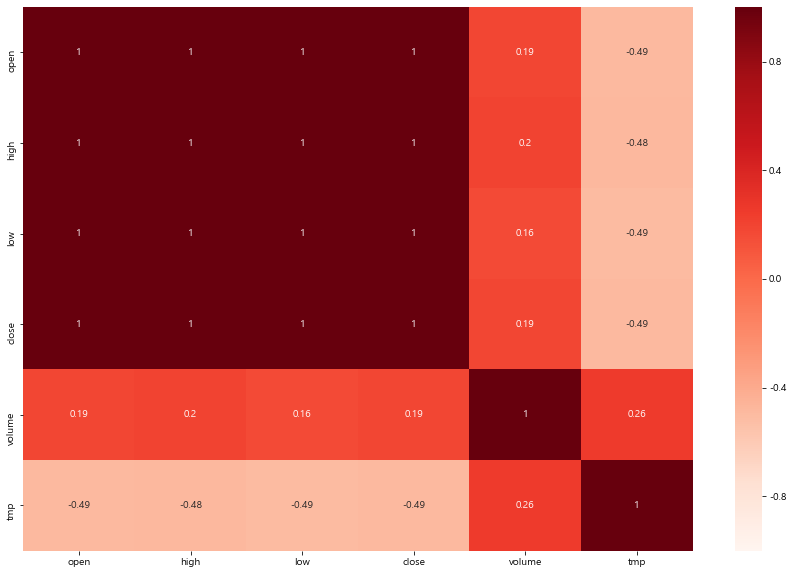

In [31]:
import seaborn as sb
day_corr=day[['open', 'high', 'low', 'close', 'volume', 'tmp']]
plt.rcParams['figure.figsize']=(15,10)

sb.heatmap(day_corr.corr(),
          annot=True,
          cmap='Reds',
          vmin = -1, vmax = 1
          )

# 월봉 단순회귀 / 선형회귀

In [32]:
#월봉 단순회귀
month = pd.read_csv('../upbit/output/비트코인+시장금리_월봉.csv', encoding='utf-8')
month.head()

,date,open,high,low,close,volume,total_mean
0,2017-09-01,4201000.0,4896000.0,4175000.0,4895000.0,3.474819e+02,2.02
1,2017-10-01,4889000.0,7479000.0,4682000.0,7422000.0,4.282096e+03,2.25
2,2017-11-01,7422000.0,13750000.0,6476000.0,11935000.0,3.328704e+05,2.35
3,2017-12-01,11935000.0,24967000.0,11201000.0,19280000.0,1.423404e+06,2.29
4,2018-01-01,19278000.0,28885000.0,10400000.0,11429000.0,1.138496e+06,2.42


In [33]:
res = ols('close ~ total_mean', data=month).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     3.004
Date:                Sun, 06 Jun 2021   Prob (F-statistic):             0.0904
Time:                        22:49:07   Log-Likelihood:                -787.52
No. Observations:                  44   AIC:                             1579.
Df Residuals:                      42   BIC:                             1583.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.894e+07   8.57e+06      3.378      0.002    1.17e+07    4.62e+07
total_mean -8.236e+06   4.75e+06     -1.733      0.090   -1.78e+07    1.35e+06
==============================================================================
Omnibus:                       44.209   Durbin-Watson:                   0.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.327
Skew:                           2.705   Prob(JB):                     2.05e-31
Kurtosis:                       9.916   Cond. No.                         9.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
res = ols('volume ~ total_mean', data=month).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 volume   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     6.760
Date:                Sun, 06 Jun 2021   Prob (F-statistic):             0.0128
Time:                        22:49:08   Log-Likelihood:                -609.67
No. Observations:                  44   AIC:                             1223.
Df Residuals:                      42   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.399e+04    1.5e+05     -0.625      0.536   -3.98e+05     2.1e+05
total_mean  2.169e+05   8.34e+04      2.600      0.013    4.86e+04    3.85e+05
==============================================================================
Omnibus:                       30.546   Durbin-Watson:                   0.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.976
Skew:                           1.840   Prob(JB):                     2.35e-16
Kurtosis:                       8.071   Cond. No.                         9.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

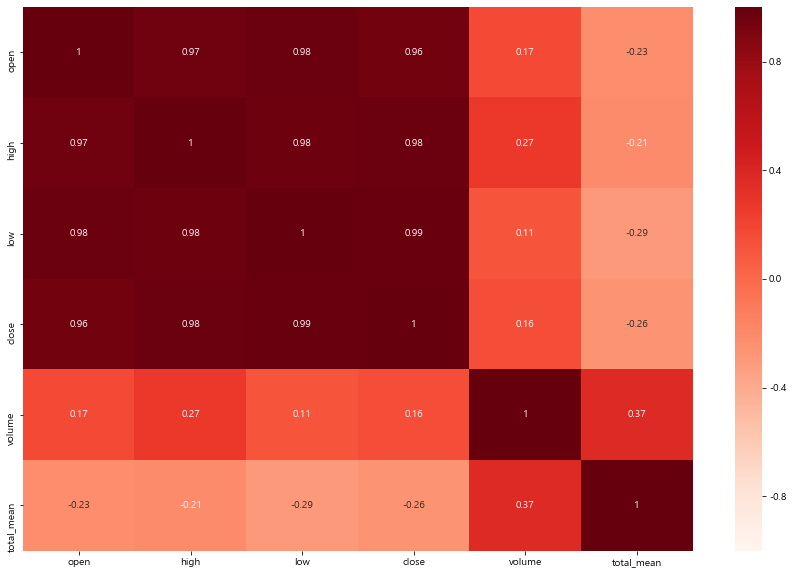

In [35]:
import seaborn as sb
month_corr=month[['open', 'high', 'low', 'close', 'volume', 'total_mean']]
plt.rcParams['figure.figsize']=(15,10)

sb.heatmap(month_corr.corr(),
          annot=True,
          cmap='Reds',
          vmin = -1, vmax = 1
          )

# 금리가 영향을 주지 못했으나 환율은 영향이 있을까?

In [36]:
usd = pd.read_csv('../upbit/data/USD_KRW 내역.csv', encoding = 'utf-8')
usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 6 columns):
날짜      964 non-null object
종가      964 non-null object
오픈      964 non-null object
고가      964 non-null object
저가      964 non-null object
변동 %    964 non-null object
dtypes: object(6)
memory usage: 45.3+ KB


In [37]:
usd.rename(columns = {'날짜' : 'date',
                     '종가' : 'usd_close',
                     '오픈' : 'usd_open',
                     '고가' : 'usd_high',
                     '저가' : 'usd_low',
                     '변동 %': 'usd_value%'}, inplace = True) 
usd.head(3)

,date,usd_close,usd_open,usd_high,usd_low,usd_value%
0,2021년 06월 03일,"1,114.65","1,110.78","1,115.42","1,109.28",0.34%
1,2021년 06월 02일,"1,110.92","1,108.49","1,114.81","1,106.78",0.23%
2,2021년 06월 01일,"1,108.38","1,108.08","1,110.59","1,104.69",0.16%


In [38]:
import datetime
usd['date'] =  usd['date'].str[0:4] + '-' + usd['date'].str[6:8] + '-' + usd['date'].str[10:12]
usd

,date,usd_close,usd_open,usd_high,usd_low,usd_value%
0,2021-06-03,"1,114.65","1,110.78","1,115.42","1,109.28",0.34%
1,2021-06-02,"1,110.92","1,108.49","1,114.81","1,106.78",0.23%
2,2021-06-01,"1,108.38","1,108.08","1,110.59","1,104.69",0.16%
3,2021-05-31,"1,106.58","1,113.83","1,117.42","1,106.50",-0.58%
4,2021-05-28,"1,113.08","1,118.72","1,119.35","1,112.86",-0.49%
...,...,...,...,...,...,...
959,2017-09-29,"1,145.30","1,146.59","1,147.81","1,141.77",-0.11%
960,2017-09-28,"1,146.58","1,145.75","1,151.65","1,142.80",0.07%
961,2017-09-27,"1,145.76","1,137.62","1,146.06","1,137.12",0.72%
962,2017-09-26,"1,137.62","1,134.80","1,140.68","1,134.66",0.25%


In [39]:
usd['date'] = pd.to_datetime(usd['date'], format="%Y-%m-%d")
usd['date'] = pd.to_datetime(usd['date']).dt.normalize()
usd

,date,usd_close,usd_open,usd_high,usd_low,usd_value%
0,2021-06-03,"1,114.65","1,110.78","1,115.42","1,109.28",0.34%
1,2021-06-02,"1,110.92","1,108.49","1,114.81","1,106.78",0.23%
2,2021-06-01,"1,108.38","1,108.08","1,110.59","1,104.69",0.16%
3,2021-05-31,"1,106.58","1,113.83","1,117.42","1,106.50",-0.58%
4,2021-05-28,"1,113.08","1,118.72","1,119.35","1,112.86",-0.49%
...,...,...,...,...,...,...
959,2017-09-29,"1,145.30","1,146.59","1,147.81","1,141.77",-0.11%
960,2017-09-28,"1,146.58","1,145.75","1,151.65","1,142.80",0.07%
961,2017-09-27,"1,145.76","1,137.62","1,146.06","1,137.12",0.72%
962,2017-09-26,"1,137.62","1,134.80","1,140.68","1,134.66",0.25%


In [40]:
usd = usd.sort_values(by=['date'], axis=0, ascending=True)
usd.reset_index(drop = True, inplace =True)

In [41]:
usd.to_csv('../upbit/output/usd.csv', encoding = 'utf-8' )

In [42]:
usd['usd_close'] =  usd['usd_close'].str[0:1] + '' + usd['usd_close'].str[2:8]
usd['usd_open'] =  usd['usd_open'].str[0:1] + '' + usd['usd_open'].str[2:8]
usd['usd_high'] =  usd['usd_high'].str[0:1] + '' + usd['usd_high'].str[2:8]
usd['usd_low'] =  usd['usd_low'].str[0:1] + '' + usd['usd_low'].str[2:8]
usd['usd_value%'] =  usd['usd_value%'].str[0:4] + '' 

usd

,date,usd_close,usd_open,usd_high,usd_low,usd_value%
0,2017-09-25,1134.80,1132.91,1137.43,1129.43,0.15
1,2017-09-26,1137.62,1134.80,1140.68,1134.66,0.25
2,2017-09-27,1145.76,1137.62,1146.06,1137.12,0.72
3,2017-09-28,1146.58,1145.75,1151.65,1142.80,0.07
4,2017-09-29,1145.30,1146.59,1147.81,1141.77,-0.1
...,...,...,...,...,...,...
959,2021-05-28,1113.08,1118.72,1119.35,1112.86,-0.4
960,2021-05-31,1106.58,1113.83,1117.42,1106.50,-0.5
961,2021-06-01,1108.38,1108.08,1110.59,1104.69,0.16
962,2021-06-02,1110.92,1108.49,1114.81,1106.78,0.23


In [43]:
usd['usd_close'] = pd.to_numeric(usd['usd_close'])
usd['usd_open'] = pd.to_numeric(usd['usd_open'])
usd['usd_high'] = pd.to_numeric(usd['usd_high'])
usd['usd_low'] = pd.to_numeric(usd['usd_low'])
usd['usd_value%'] = pd.to_numeric(usd['usd_value%'])

In [44]:
usd.to_csv('../upbit/output/usd.csv', encoding = 'utf-8' )
usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 6 columns):
date          964 non-null datetime64[ns]
usd_close     964 non-null float64
usd_open      964 non-null float64
usd_high      964 non-null float64
usd_low       964 non-null float64
usd_value%    964 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 45.3 KB


In [47]:
day['date'] = pd.to_datetime(day['date'], format="%Y-%m-%d")
day['date'] = pd.to_datetime(day['date']).dt.normalize()
day

day.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1347 entries, 0 to 1346
Data columns (total 7 columns):
date      1347 non-null datetime64[ns]
open      1347 non-null float64
high      1347 non-null float64
low       1347 non-null float64
close     1347 non-null float64
volume    1347 non-null float64
tmp       905 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 84.2 KB


In [48]:
day_usd = pd.merge(day, usd, on= 'date', how="outer") 
day_usd = day_usd.drop(index=[1347], axis=0)
day_usd.tail(5)

,date,open,high,low,close,volume,tmp,usd_close,usd_open,usd_high,usd_low,usd_value%
1342,2021-05-29,43723000.0,44812000.0,41405000.0,42688000.0,10628.404447,NaN,NaN,NaN,NaN,NaN,NaN
1343,2021-05-30,42688000.0,43827000.0,40580000.0,43177000.0,9194.807917,NaN,NaN,NaN,NaN,NaN,NaN
1344,2021-05-31,43177000.0,44235000.0,41304000.0,43761000.0,10111.066220,0.94,1106.58,1113.83,1117.42,1106.50,-0.50
1345,2021-06-01,43761000.0,44550000.0,42515000.0,43200000.0,9081.150288,0.94,1108.38,1108.08,1110.59,1104.69,0.16
1346,2021-06-02,43207000.0,43435000.0,42804000.0,42865000.0,330.278103,NaN,1110.92,1108.49,1114.81,1106.78,0.23


In [49]:
day_usd.to_csv('../upbit/output/비트코인+금리+환율.csv', encoding= 'utf-8')

In [50]:
day_usd.fillna(method='pad', inplace= True)
day_usd.isnull().sum()
day_usd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1347 entries, 0 to 1346
Data columns (total 12 columns):
date          1347 non-null datetime64[ns]
open          1347 non-null float64
high          1347 non-null float64
low           1347 non-null float64
close         1347 non-null float64
volume        1347 non-null float64
tmp           1347 non-null float64
usd_close     1347 non-null float64
usd_open      1347 non-null float64
usd_high      1347 non-null float64
usd_low       1347 non-null float64
usd_value%    1347 non-null float64
dtypes: datetime64[ns](1), float64(11)
memory usage: 136.8 KB


In [117]:
fig = make_subplots(rows=3, cols=1, 
                    shared_xaxes=True, 
                    vertical_spacing=0.02,
                    specs=[[{"secondary_y": True}],[{"secondary_y": True}], [{"secondary_y": True}]])

In [118]:
#비트코인 가격과 환율
fig.add_trace(go.Scatter(x = day_usd.date, y = day_usd.usd_close,
                         mode = 'lines', name = '일별 usd 환율', connectgaps=True, marker_color= 'orange', line = dict(width=1.5)),
                secondary_y = False,row = 1, col = 1)

fig.add_trace(go.Scatter(x = day_usd.date, y = day_usd.close,
                        mode = 'lines', name =  '비트코인 가격', connectgaps=True, marker_color= 'green', line = dict(width=3)),
                secondary_y = True,row = 1, col = 1)

fig.add_trace(go.Scatter(x = day_usd.date, y = day_usd.high,
                        mode = 'lines', name =  '상한가', connectgaps=True, marker_color= 'red', line = dict(width=3)),
                secondary_y = True,row = 1, col = 1)

fig.add_trace(go.Scatter(x = day_usd.date, y = day_usd.low,
                        mode = 'lines', name =  '하한가', connectgaps=True, marker_color= 'blue', line = dict(width=3)),
                secondary_y = True,row = 1, col = 1)


#비트코인 거래량과 환율 
fig.add_trace(go.Bar(x=day_usd.date, y=day_usd.volume, name = '비트코인 거래량', marker_color= 'blue'),
                secondary_y = False,row = 2, col = 1)

fig.add_trace(go.Scatter(x = day_usd.date, y = day_usd.usd_close,
                         mode = 'lines', name = '일별 usd 환율', connectgaps=True, marker_color= 'orange', line = dict(width=1.5)),
                secondary_y = True,row = 2, col = 1)


#시장금리와 환율 
fig.add_trace(go.Scatter(x=day_usd.date, y=day_usd.tmp, name = '시장금리', marker_color= 'salmon'),
                secondary_y = False,row = 3, col = 1)

fig.add_trace(go.Scatter(x = day_usd.date, y = day_usd.usd_close,
                         mode = 'lines', name = '일별 usd 환율', connectgaps=True, marker_color= 'orange', line = dict(width=1.5)),
                secondary_y = True,row = 3, col = 1)

#서식
fig.update_layout(height=800, width=950, barmode='stack',
                  title_text= "USD 환율과 비트코인")

fig.update_yaxes(title_text="달러와 비트코인 가격", row = 1, col = 1)
fig.update_yaxes(title_text="달러와 비트코인 거래량", row = 2, col = 1)
fig.update_yaxes(title_text="시장금리와 달러", row = 3, col = 1)

In [51]:
res = ols('close ~ usd_close', data=day_usd).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     49.25
Date:                Sun, 06 Jun 2021   Prob (F-statistic):           3.56e-12
Time:                        22:49:16   Log-Likelihood:                -24228.
No. Observations:                1347   AIC:                         4.846e+04
Df Residuals:                    1345   BIC:                         4.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.011e+07   1.06e+07      8.463      0.000    6.92e+07    1.11e+08
usd_close   -6.54e+04   9319.444     -7.018      0.000   -8.37e+04   -4.71e+04
==============================================================================
Omnibus:                      640.337   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2681.160
Skew:                           2.353   Prob(JB):                         0.00
Kurtosis:                       8.062   Cond. No.                     2.85e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

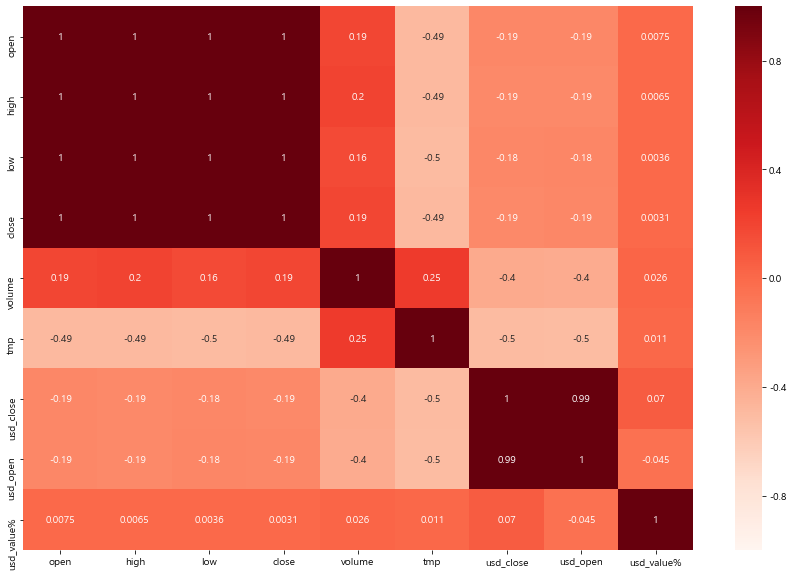

In [52]:
import seaborn as sb
day_usd_corr = day_usd[['open', 'high', 'low', 'close', 'volume', 'tmp', 'usd_close', 'usd_open', 'usd_value%']]
plt.rcParams['figure.figsize']=(15,10)

sb.heatmap(day_usd_corr.corr(),
          annot=True,
          cmap='Reds',
          vmin = -1, vmax = 1
          )

# 월별로 봐도 영향이 없을까

In [53]:
usd_month = pd.read_csv('../upbit/data/월별 USD_KRW 내역.csv', encoding = 'utf-8')
usd_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
날짜      45 non-null object
종가      45 non-null object
오픈      45 non-null object
고가      45 non-null object
저가      45 non-null object
변동 %    45 non-null object
dtypes: object(6)
memory usage: 2.2+ KB


In [54]:
usd_month.rename(columns = {'날짜' : 'date',
                     '종가' : 'usd_close',
                     '오픈' : 'usd_open',
                     '고가' : 'usd_high',
                     '저가' : 'usd_low',
                     '변동 %': 'usd_value%'}, inplace = True) 
usd_month.head(10)

,date,usd_close,usd_open,usd_high,usd_low,usd_value%
0,2017년 10월,"1,117.42","1,145.13","1,149.68","1,116.04",-2.35%
1,2017년 11월,"1,087.13","1,118.42","1,122.38","1,074.71",-2.71%
2,2017년 12월,"1,066.37","1,088.14","1,097.08","1,063.94",-1.91%
3,2018년 1월,"1,069.08","1,067.38","1,077.85","1,055.67",0.25%
4,2018년 2월,"1,084.21","1,070.12","1,099.04","1,061.85",1.42%
5,2018년 3월,"1,060.25","1,085.21","1,088.32","1,060.47",-2.21%
6,2018년 4월,"1,069.33","1,060.56","1,084.95","1,052.78",0.86%
7,2018년 5월,"1,079.59","1,070.45","1,087.59","1,064.14",0.96%
8,2018년 6월,"1,113.91","1,080.59","1,126.10","1,065.78",3.18%
9,2018년 7월,"1,112.25","1,115.01","1,141.11","1,109.25",-0.15%


In [55]:
usd_month.replace('월', '', inplace=True)
usd_month.head()

,date,usd_close,usd_open,usd_high,usd_low,usd_value%
0,2017년 10월,"1,117.42","1,145.13","1,149.68","1,116.04",-2.35%
1,2017년 11월,"1,087.13","1,118.42","1,122.38","1,074.71",-2.71%
2,2017년 12월,"1,066.37","1,088.14","1,097.08","1,063.94",-1.91%
3,2018년 1월,"1,069.08","1,067.38","1,077.85","1,055.67",0.25%
4,2018년 2월,"1,084.21","1,070.12","1,099.04","1,061.85",1.42%


In [56]:
usd_month['date']= usd_month['date'].str[:-1]
usd_month['date'] = usd_month['date'].str[0:4] + '-' +usd_month['date'].str[6:]
usd_month.head()

,date,usd_close,usd_open,usd_high,usd_low,usd_value%
0,2017-10,"1,117.42","1,145.13","1,149.68","1,116.04",-2.35%
1,2017-11,"1,087.13","1,118.42","1,122.38","1,074.71",-2.71%
2,2017-12,"1,066.37","1,088.14","1,097.08","1,063.94",-1.91%
3,2018-1,"1,069.08","1,067.38","1,077.85","1,055.67",0.25%
4,2018-2,"1,084.21","1,070.12","1,099.04","1,061.85",1.42%


In [57]:
usd_month['usd_close'] =  usd_month['usd_close'].str[0:1] + '' + usd_month['usd_close'].str[2:8]
usd_month['usd_open'] =  usd_month['usd_open'].str[0:1] + '' + usd_month['usd_open'].str[2:8]
usd_month['usd_high'] =  usd_month['usd_high'].str[0:1] + '' + usd_month['usd_high'].str[2:8]
usd_month['usd_low'] =  usd_month['usd_low'].str[0:1] + '' + usd_month['usd_low'].str[2:8]
usd_month['usd_value%'] =  usd_month['usd_value%'].str[0:4] + '' 

usd_month.head()

,date,usd_close,usd_open,usd_high,usd_low,usd_value%
0,2017-10,1117.42,1145.13,1149.68,1116.04,-2.3
1,2017-11,1087.13,1118.42,1122.38,1074.71,-2.7
2,2017-12,1066.37,1088.14,1097.08,1063.94,-1.9
3,2018-1,1069.08,1067.38,1077.85,1055.67,0.25
4,2018-2,1084.21,1070.12,1099.04,1061.85,1.42


In [58]:
usd_month['usd_close'] = pd.to_numeric(usd_month['usd_close'])
usd_month['usd_open'] = pd.to_numeric(usd_month['usd_open'])
usd_month['usd_high'] = pd.to_numeric(usd_month['usd_high'])
usd_month['usd_low'] = pd.to_numeric(usd_month['usd_low'])
usd_month['usd_value%'] = pd.to_numeric(usd_month['usd_value%'])

usd_month['date'] = pd.to_datetime(usd_month['date'], format="%Y-%m-%d")
usd_month['date'] = pd.to_datetime(usd_month['date']).dt.normalize()
usd_month.head()

,date,usd_close,usd_open,usd_high,usd_low,usd_value%
0,2017-10-01,1117.42,1145.13,1149.68,1116.04,-2.30
1,2017-11-01,1087.13,1118.42,1122.38,1074.71,-2.70
2,2017-12-01,1066.37,1088.14,1097.08,1063.94,-1.90
3,2018-01-01,1069.08,1067.38,1077.85,1055.67,0.25
4,2018-02-01,1084.21,1070.12,1099.04,1061.85,1.42


In [59]:
month['date'] = pd.to_datetime(month['date'], format="%Y-%m-%d")
month['date'] = pd.to_datetime(month['date']).dt.normalize()
month.tail()

,date,open,high,low,close,volume,total_mean
39,2020-12-01,21313000.0,32386000.0,19216000.0,32042000.0,225919.115769,1.32
40,2021-01-01,32037000.0,48550000.0,31662000.0,36408000.0,502401.950832,1.34
41,2021-02-01,36408000.0,65985000.0,35907000.0,51798000.0,382508.391547,1.40
42,2021-03-01,51798000.0,72000000.0,51560000.0,71513000.0,298657.889466,1.57
43,2021-04-01,71480000.0,81994000.0,54964000.0,67939000.0,330777.599272,1.59


In [60]:
month_usd = pd.merge(month, usd_month, on= 'date', how="outer") 
month_usd = month_usd.drop(index=[44, 45], axis=0)
month_usd

,date,open,high,low,close,volume,total_mean,usd_close,usd_open,usd_high,usd_low,usd_value%
0,2017-09-01,4201000.0,4896000.0,4175000.0,4895000.0,3.474819e+02,2.02,NaN,NaN,NaN,NaN,NaN
1,2017-10-01,4889000.0,7479000.0,4682000.0,7422000.0,4.282096e+03,2.25,1117.42,1145.13,1149.68,1116.04,-2.30
2,2017-11-01,7422000.0,13750000.0,6476000.0,11935000.0,3.328704e+05,2.35,1087.13,1118.42,1122.38,1074.71,-2.70
3,2017-12-01,11935000.0,24967000.0,11201000.0,19280000.0,1.423404e+06,2.29,1066.37,1088.14,1097.08,1063.94,-1.90
4,2018-01-01,19278000.0,28885000.0,10400000.0,11429000.0,1.138496e+06,2.42,1069.08,1067.38,1077.85,1055.67,0.25
5,2018-02-01,11439000.0,14149000.0,6620000.0,11860000.0,7.806840e+05,2.53,1084.21,1070.12,1099.04,1061.85,1.42
6,2018-03-01,11865000.0,12899000.0,7431000.0,7697000.0,5.759458e+05,2.49,1060.25,1085.21,1088.32,1060.47,-2.20
7,2018-04-01,7688000.0,10755000.0,7087000.0,10138000.0,5.736338e+05,2.43,1069.33,1060.56,1084.95,1052.78,0.86
8,2018-05-01,10135000.0,10963000.0,7813000.0,8282000.0,2.722675e+05,2.51,1079.59,1070.45,1087.59,1064.14,0.96
9,2018-06-01,8278000.0,8490000.0,6590000.0,7164000.0,1.177830e+05,2.43,1113.91,1080.59,1126.10,1065.78,3.18


In [61]:
month_usd.to_csv('../upbit/output/월봉비트코인+금리+월환율.csv', encoding='utf-8')

<AxesSubplot:>

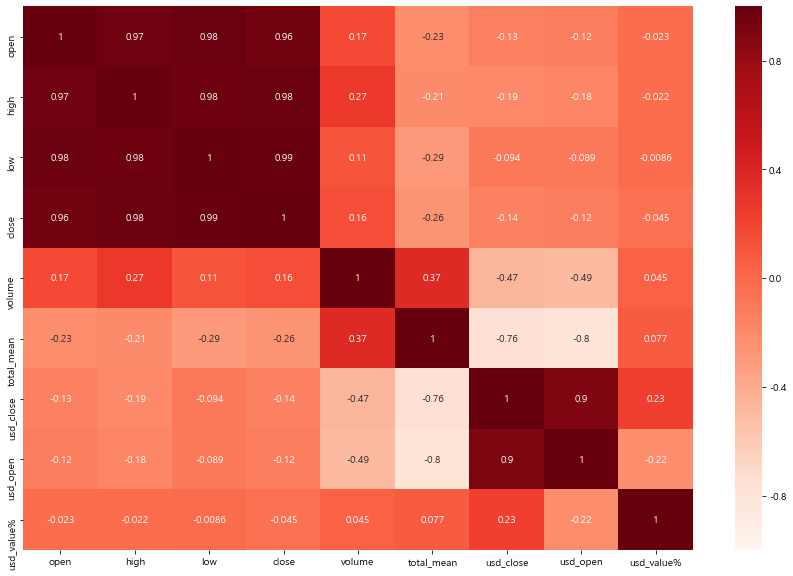

In [62]:
import seaborn as sb
month_usd_corr = month_usd[['open', 'high', 'low', 'close', 'volume', 'total_mean', 'usd_close', 'usd_open', 'usd_value%']]
plt.rcParams['figure.figsize']=(15,10)

sb.heatmap(month_usd_corr.corr(),
          annot=True,
          cmap='Reds',
          vmin = -1, vmax = 1
          )